In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin


In [3]:
housing = pd.read_csv("../data/processed/housing_ingest.csv")

In [4]:
housing.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [5]:
housing.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

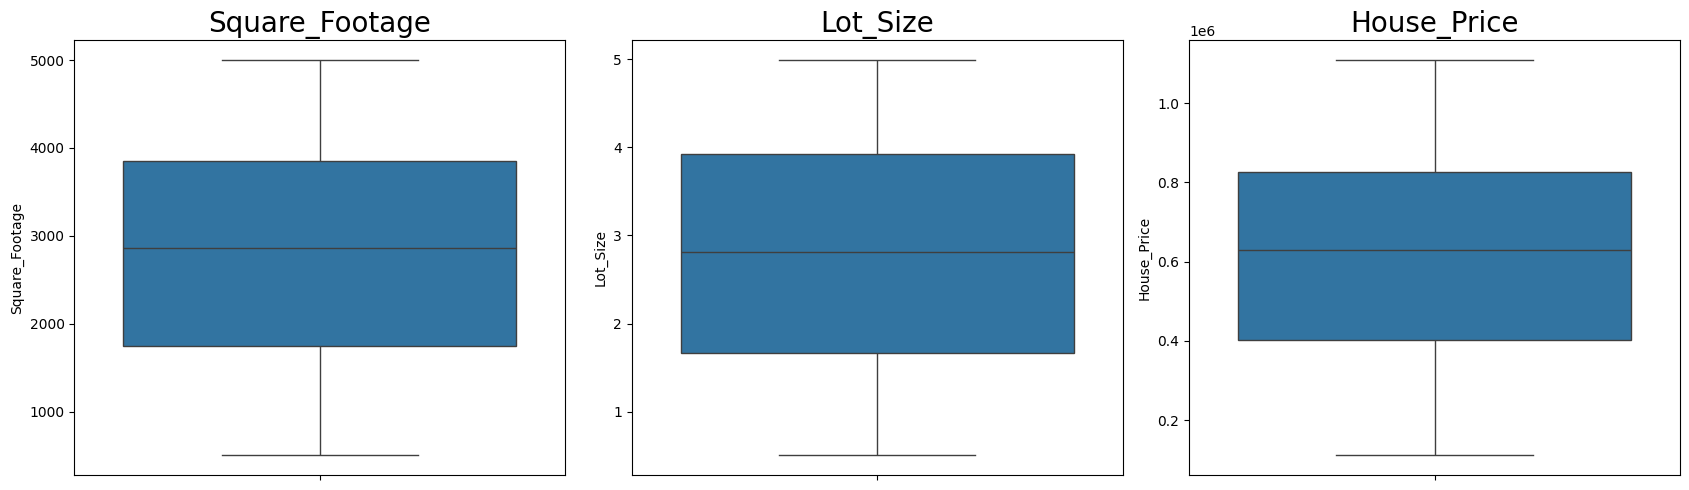

In [6]:
columns = ["Square_Footage","Lot_Size","House_Price"]
plt.figure(figsize=(17, 5))

for i,col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    plt.title(col, fontsize=20)
    sns.boxplot(housing[col])
plt.tight_layout()
plt.show()

In [7]:
y = housing[["House_Price"]]
x = housing[["Square_Footage","Num_Bedrooms","Num_Bathrooms","Year_Built","Lot_Size","Neighborhood_Quality"]]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44)


In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=44)


In [10]:

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        
        X['SqFt_per_Bed'] = X['Square_Footage'] / X['Num_Bedrooms'].replace(0, 1)
        X['Bath_per_Bed'] = X['Num_Bathrooms'] / X['Num_Bedrooms'].replace(0, 1)
        X['Lot_per_SqFt'] = X['Lot_Size'] / X['Square_Footage'].replace(0, 1)
        X['SqFt_x_Quality'] = X['Square_Footage'] * X['Neighborhood_Quality']
        X['Beds_x_Baths'] = X['Num_Bedrooms'] * X['Num_Bathrooms']
        
        return X


In [11]:
numeric_features = ["Square_Footage","Num_Bedrooms","Num_Bathrooms","Year_Built","Lot_Size",'SqFt_per_Bed',"Bath_per_Bed","Lot_per_SqFt","SqFt_x_Quality","Beds_x_Baths","Neighborhood_Quality"]
preprocess = ColumnTransformer([('num', StandardScaler(), numeric_features)])
pipeline = Pipeline([
    ('fe', FeatureEngineer()),   
    ('preprocess', preprocess)  
])

In [12]:
pipeline.fit(X_train, y_train)


,steps,"[('fe', ...), ('preprocess', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [13]:
X_train_prepared = pipeline.transform(X_train)   
X_val_prepared  = pipeline.transform(X_val)     
X_test_prepared = pipeline.transform(X_test)    


In [14]:
X_train_fe = FeatureEngineer().fit_transform(X_train)
all_columns = X_train_fe.columns.tolist()


In [15]:
X_train = pd.DataFrame(X_train_prepared, columns=all_columns, index=X_train.index)
X_val = pd.DataFrame(X_val_prepared, columns=all_columns, index=X_val.index)
X_test = pd.DataFrame(X_test_prepared, columns=all_columns, index=X_test.index)




In [16]:
X_train = X_train.to_csv("../data/processed/x_train.csv",index=False)
X_val = X_val.to_csv("../data/processed/x_val.csv",index=False)
X_test = X_test.to_csv("../data/processed/x_test.csv",index=False)

In [17]:
y_train = y_train.to_csv("../data/processed/y_train.csv",index=False)
y_val = y_val.to_csv("../data/processed/y_val.csv",index=False)
y_test = y_test.to_csv("../data/processed/y_test.csv",index=False)